In [1]:
from IPython.core import display
from io import BytesIO
from PIL import Image
import numpy as np
import random
import os
import neurolab as nl
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import time
import pylab as pl

%matplotlib inline

In [2]:
os.chdir("..")
%pwd

u'C:\\Users\\joeal_000\\Documents\\GitHub\\compOpt_Project'

In [3]:
def getData(path):
    "Splits the data into X and y both being numpy arrays (data already normalized)"
    f = open(path)
    lines = f.readlines()
    f.close
    
    images = []
    classification = []
    for line in lines:
        nums = line.split()
        classification.append(nums[0])
        images.append([((float (val))) for val in nums[1:]])
    return (np.array(classification, dtype=np.float),np.array(images))

In [4]:
classification,data = getData('combinedData.txt')
#classification = np.loadtxt('classification.txt')
#data = np.loadtxt('features/data80NetFeatures.txt')

trainData = np.array(data[:300])
trainClass = np.array(classification[:300])
testData = np.array(data[300:])
testClass = np.array(classification[300:])

In [8]:
def runAll(trData, trClass, teData, teClass, k):
    
    errorsIn = []
    errorsOut = []
    best = []
    
    inputParams = [[-1, 1]] * len(trData[0])
    
    for i in range(10):
        #classification for 1 or -1 for this data set
        g = lambda x: [1] if x == i else [-1]
        c = np.array(map(g, trClass))
        
        #k fold cross validation
        size = len(trData)
        step = size/k
        
        #some variables to be replaced with best values
        elow = [10]
        bestNet = None
                    
        print i
        for j in range(k):       
            #make neural network for this digit
            ann = nl.net.newff(inputParams, [7,3,1])
            ann.trainf = nl.train.train_gdx
            f = nl.error.MAE()
            ann.errorf = f
            
            ##partition the data into k-1 training and 1 testing
            test = trData[j:j+step]
            testAns = c[j:j+step]
            train = np.concatenate((trData[0:j],trData[j+step:]))
            trainAns = np.concatenate((c[0:j],c[j+step:]))
            
            #start training
            e = ann.train(train, trainAns,epochs=1, goal=0.20)
            
            #if the error is the best for this digit so far record it and the neural network used
            if elow[-1] > e[-1]:
                elow = e
                bestNet = ann
            
            #add In error for plots and blaw blaw
        print elow[-1]
        errorsIn.append(elow)
        best.append(bestNet)
            
            #test for Eout
        out = np.sign(bestNet.sim(teData))
        errorsOut.append(out)
            
    return errorsIn,errorsOut,best

In [9]:
ein,eout,best = runAll(trainData, trainClass, testData, testClass, 10)

0
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
0.444657553174
1
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
0.332601245737
2
The maximum number of train epochs is reache

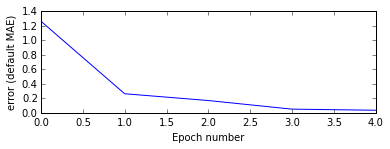

In [11]:
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default MAE)')

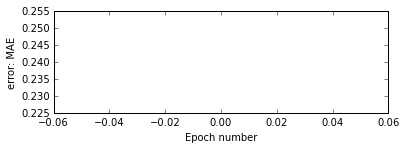

In [10]:
pl.subplot(211)
pl.plot(ein[-1])
pl.xlabel('Epoch number')
pl.ylabel('error: MAE')

In [16]:
testt = best[7]

In [17]:
te = np.array(map(lambda x: [1] if x == 9 else [-1],testClass))
tes = np.sign(testt.sim(testData))
f = nl.error.MAE()
f(tes, eout[7])

0.0

In [18]:
tes[2]

array([-1.])

In [115]:
te[2]

array([1])

In [112]:
testClass[2]

9.0